<a href="https://colab.research.google.com/github/altn714/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(2)_EDA_%EB%B0%8F_%EC%A0%84%EC%B2%98%EB%A6%AC_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **employee1, employee2 아직 못함**

In [ ]:
train.isnull().sum()

inst_id                0
OC                     0
sido                   0
sgg                    0
openDate               0
bedCount               1
instkind               1
revenue1               8
salescost1             8
sga1                   8
salary1                8
noi1                   8
noe1                   8
interest1              8
ctax1                  8
profit1                8
liquidAsset1           8
quickAsset1            8
receivableS1           8
inventoryAsset1        8
nonCAsset1             8
tanAsset1              8
OnonCAsset1            8
receivableL1           8
debt1                  8
liquidLiabilities1     8
shortLoan1             8
NCLiabilities1         8
longLoan1              8
netAsset1              8
surplus1               8
revenue2               8
salescost2             8
sga2                   8
salary2                8
noi2                   8
noe2                   8
interest2              8
ctax2                  8
profit2                8


In [ ]:
train['bedCount']

0      175.0
2      468.0
3      353.0
4      196.0
5      243.0
       ...  
296    214.0
297      NaN
298      NaN
299    180.0
300      NaN
Name: bedCount, Length: 292, dtype: float64

# **데이터 로딩 및 확인**

In [3]:
import pandas as pd
import numpy as np

train = pd.read_csv("/content/train 지역변수 추가.csv")
te = pd.read_csv("/content/test 지역변수 추가.csv")
sd = pd.read_csv("/content/submission_sample.csv")

In [4]:
train.head(3)
train.shape

(301, 59)

In [5]:
te.head(3)
te.shape

(127, 59)

In [6]:
sd.head(3)
sd.shape

(127, 2)

# **데이터 전처리**

In [7]:
# inst_id, sgg 열 삭제
train.drop(['inst_id','sgg'],axis=1,inplace=True)
te.drop(['inst_id','sgg'],axis=1,inplace=True)

# **1. 결측치 처리** 

1) (문자형) ownerchange: 전체 비율 고려한 대체 *4조

3) (숫자형) bedcount, employee -> eda 해보기 -> 고민,, *4조 평균 대체, 1등 코드: 결측 처리 안함

결측치 처리 방법

1. instkind
> instkind 병원 별로 병원의 규모가 나뉨 -> groupby(tr["instkind"]) 통해 병원 별 평균값 넣음.
> 전체 평균값 넣음.

2. bedCount
> 병원 별 평균값
> 전체 평균값


병원종류(instkind)의 결측치 채우는 방법에 대한 고찰

병원 종류는 입원환자 수용정도에 따라 달라진다. 따라서 bedCount가 아주 중요하다. 그러나 bedCount가 동시에 없는 row도 있다.
일단 bedCount를 기준으로 나눠서 채워준다.
bedCount가 없을 경우 employee를 통해 유추할 수 밖에 없다.
마지막 방법은, 어렵겠지만, 회계 데이터 분석을 통해 대표변경 여부를 분류 분석하는 것이다.
임직원 수(employee)의 결측치 채우는 방법에 대한 고찰

마찬가지로 병원 종류에 맞춰 평균값을 넣어주는 방법이 있다.
만약 병원 종류가 없다면, 급여액을 통해서 몇명일지를 유추할 수 있다.
대표변경(ownerChange)의 결측치 채우는 방법에 대한 고찰

첫 번째 방법은, 가장 높은 빈도수를 가지는 밸류로 채우는 것이다. 아마도 same 일 것이다.
두 번째 방법은, 바로 전 데이터 포인트의 밸류로 채우는 것이다.
세 번째 방법은, 어렵겠지만, 회계데이터 분석을 통해 대표변경 여부를 분류 분석하는 것이다.
마지막 방법은, 지워버리는 것이다. 그러나 애초에 데이터가 400개도 안되는데 지우면 더더욱 분석이 힘들어진다.
오픈시기(openDate)의 결측치 채우는 방법에 대한 고찰

te 테이블에 openDate 결측치가 딱 하나 있는데, 이걸 어떻게 채워야 될 것인가 고민해보자.
openDate는 다른 자료를 통해 유추하기 가장 힘든 변수이다. ffill, bfill을 통해서 넣은 게 나을 것 같다.

**1) (문자형) inst_kind 삭제, ownerchange 최빈 값? 0? 평균? 중앙값?**

In [8]:
train['ownerChange']

0      same
1      same
2      same
3      same
4      same
       ... 
296    same
297    same
298     NaN
299     NaN
300    same
Name: ownerChange, Length: 301, dtype: object

In [9]:
# instkind 결측치 행 전체 삭제
train.dropna(subset=['instkind'],axis=0,inplace=True)
te.dropna(subset=['instkind'],axis=0,inplace=True)

1) Owner change EDA

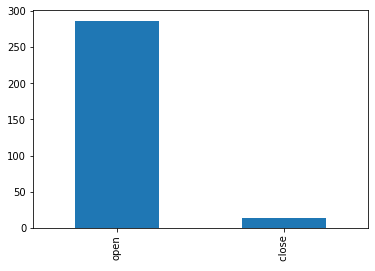

In [10]:
#target값 분석
train['OC'].value_counts().plot.bar()

In [11]:
train['ownerChange'].mode()[0]
train.loc[train['ownerChange'].isna(),'ownerChange'] = train['ownerChange'].mode()[0]
train['ownerChange'].isna().sum()

0

**2) 금융변수: 모든 누락 행 삭제 *1등 코드, 4조**

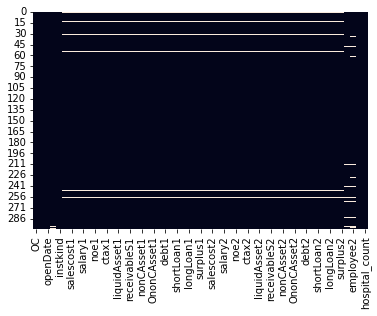

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.heatmap(train.isnull(),cbar=False)

결론: 모든 금융변수는 동일한 행의 누락이 있다. 따라서, 누락이 있는 행들을 모두 삭제

In [13]:
#금융변수들의 누락 행 삭제 
train.dropna(subset=['salescost1'],axis=0,inplace=True)
te.dropna(subset=['salescost1'],axis=0,inplace=True)

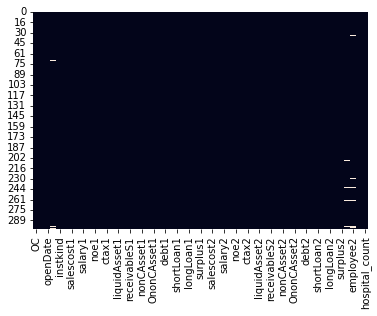

In [14]:
sns.heatmap(train.isnull(),cbar=False)

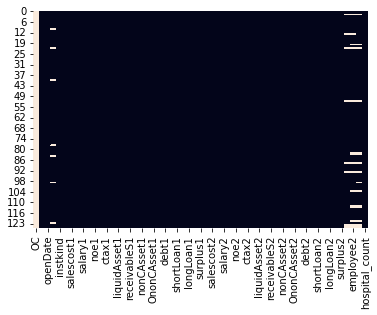

In [15]:
sns.heatmap(te.isnull(),cbar=False)

**3) (숫자형) bedcount, employee**

3)-1 bedcount 결측치 처리

In [16]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

formula = 'bedCount ~ C(instkind)'
lm = ols(formula, train).fit()
print(anova_lm(lm))
#F검정결과, p-value 극소해서 병원 별 병상 수의 관계 유의 -> 병상수의 결측값을 병원 별 평균값 또는 중앙값, 최빈값으로 채울 수 있다. 

                df        sum_sq        mean_sq          F        PR(>F)
C(instkind)    6.0  1.229828e+06  204971.363109  20.788425  3.790328e-20
Residual     281.0  2.770626e+06    9859.879542        NaN           NaN


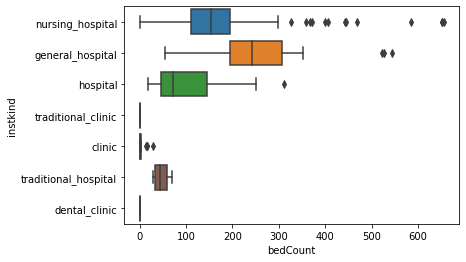

In [17]:
import seaborn as sns
sns.boxplot(data=train, x='bedCount', y='instkind')
#이상치가 많아서 평균값 대신 중앙값 또는 최빈값으로 결측치 처리하는게 좋을 것 같음.

In [18]:
train.groupby('instkind')['bedCount'].mean()
train['bedCount'] = train['bedCount'].fillna(train.groupby('instkind')['bedCount'].transform('mean')) 

train['bedCount'].isnull().sum()

0

In [19]:
te.groupby('instkind')['bedCount'].mean()
te['bedCount'] = te['bedCount'].fillna(te.groupby('instkind')['bedCount'].transform('mean')) 
te['bedCount'].isnull().sum()

1

# 2. 문자형 숫자형으로 대체  
적용 변수: OC, ownerChange

In [20]:
#OC open 1, close 0 대체
# 레이블 OC 0 또는 1로 변환
for i in range(0,len(train["OC"])):
  if train.iloc[i,0] == "open":
    train.iloc[i, 0]=1
  else:
    train.iloc[i, 0]=0  

In [21]:
#ownerChange 전체 비율로 대체
round(train['ownerChange'].value_counts(normalize=True),3)
train['ownerChange'] = train['ownerChange'].fillna(pd.Series(np.random.choice(['same','change'], p=[0.85,0.15],size = 300)))